<a href="https://colab.research.google.com/github/Kamo-code/En_Able/blob/main/En_Able_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
         Country  Unemployment_Rate  Disability_Unemployment_Rate  \
0    Afghanistan               15.4                          90.0   
1        Somalia               14.8                          20.3   
2  South America                3.8                           7.5   
3   South Africa               32.6                          90.0   
4       Tanzania                7.8                          90.0   

   Total_Population(in millions)  
0                           43.4  
1                           17.1  
2                          440.0  
3                           60.1  
4                           67.0  

Basic Statistics:
count     7.000000
mean     64.257143
std      35.236054
min       7.500000
25%      46.150000
50%      80.000000
75%      90.000000
max      90.000000
Name: Disability_Unemployment_Rate, dtype: float64


<ipython-input-23-bbc2bb758aff>:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




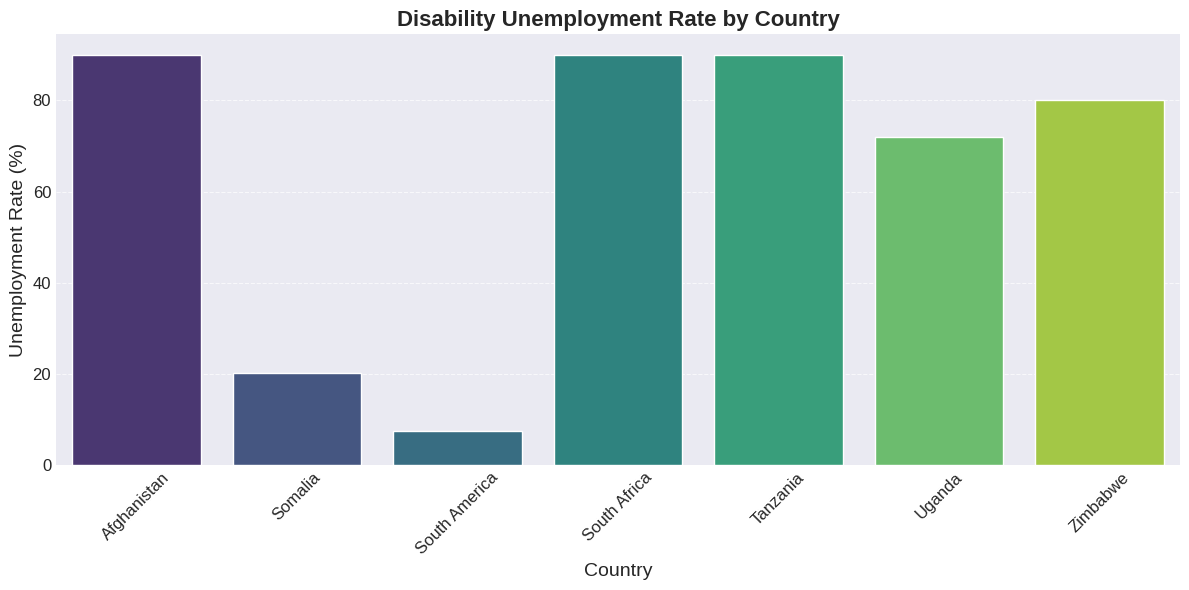

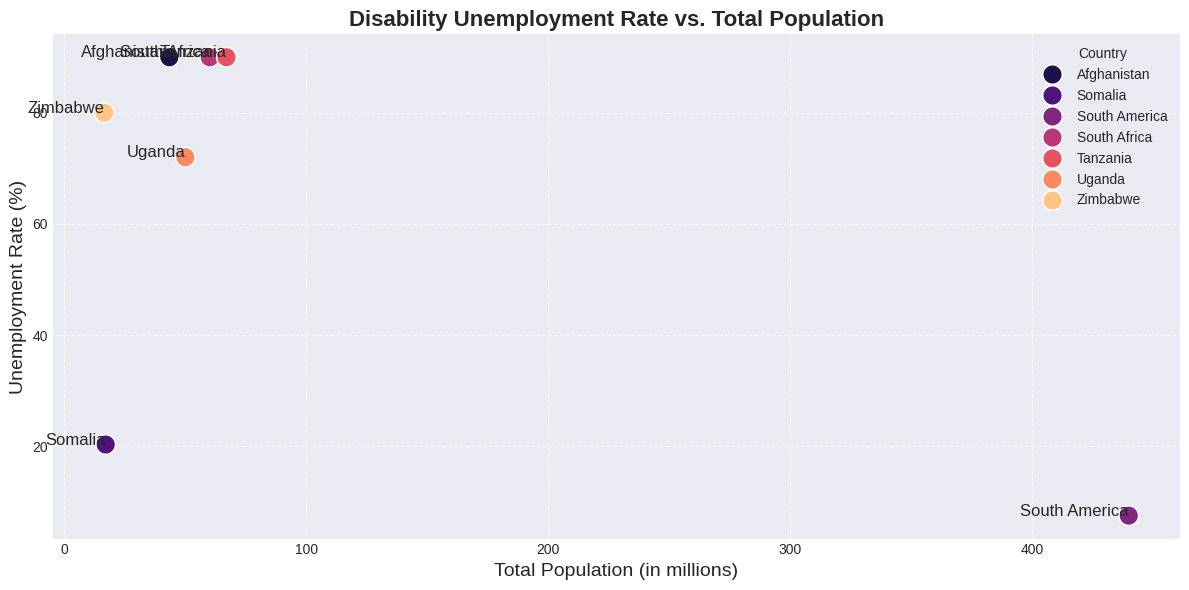

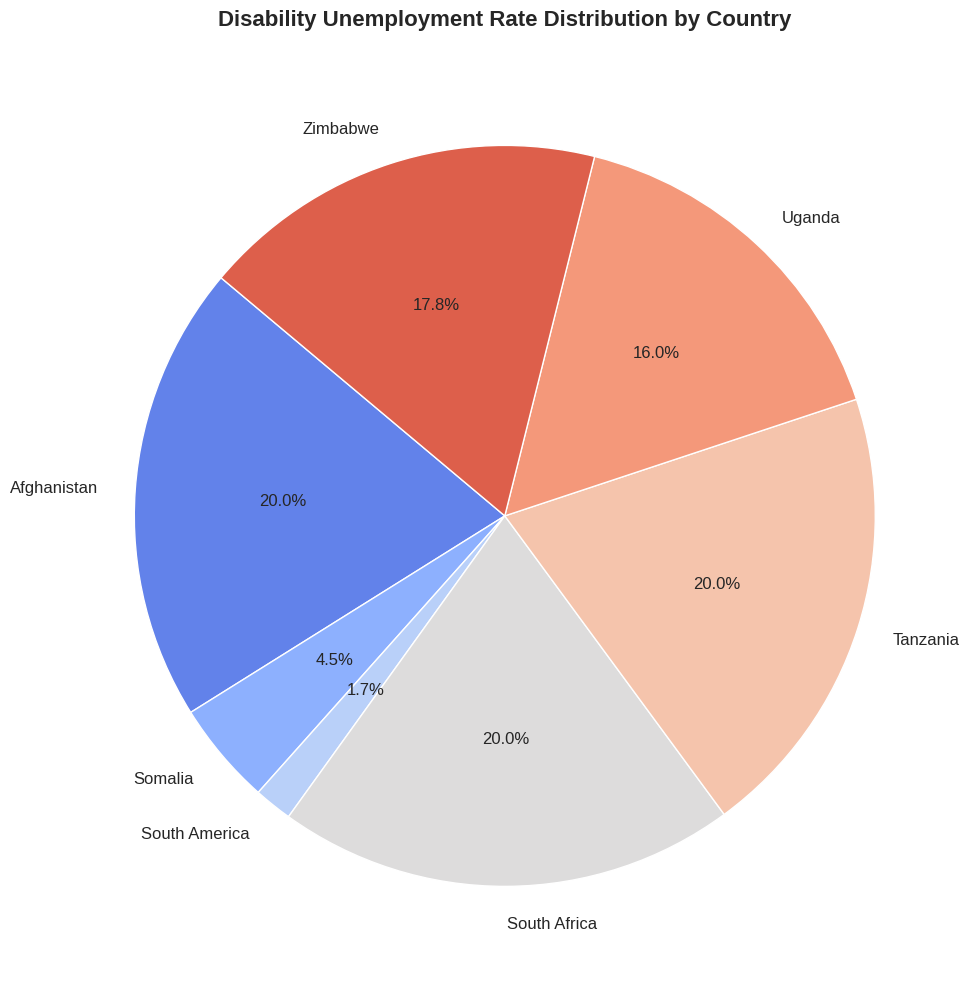

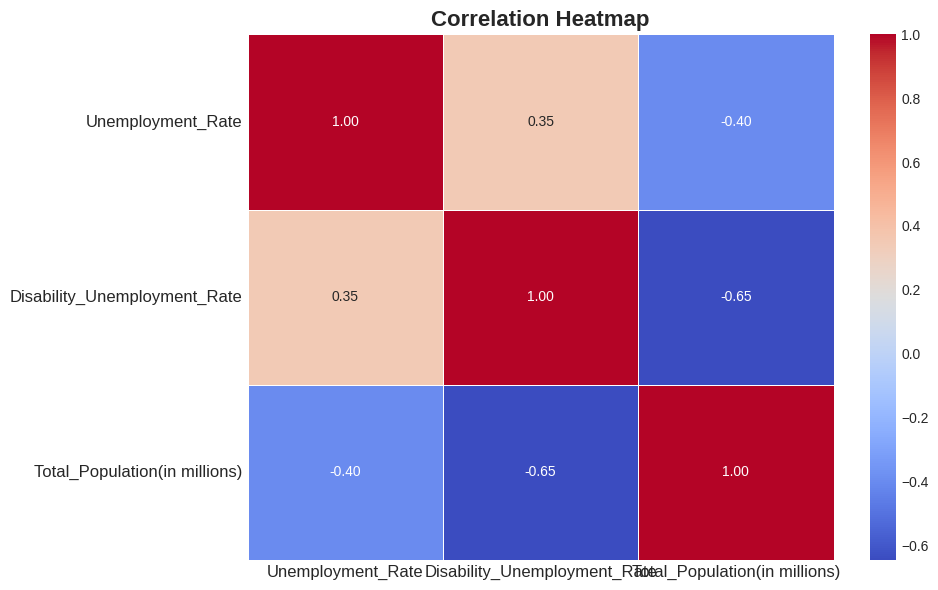

<ipython-input-23-bbc2bb758aff>:99: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




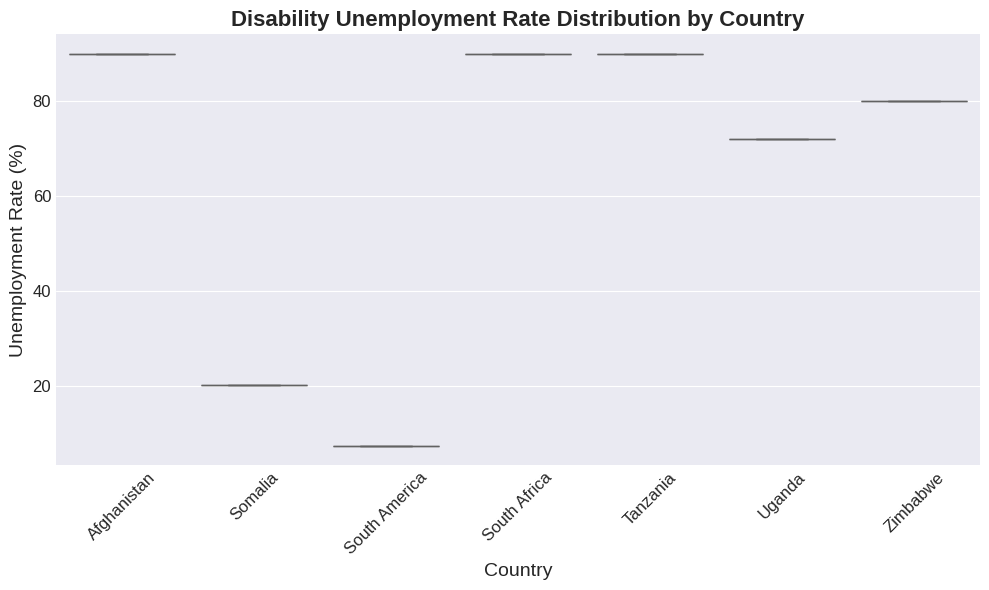

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Sample data (with matched lists - fixing the mismatch in your original data)
data = {
    "Country": ["Afghanistan", "Somalia", "South America", "South Africa", "Tanzania", "Uganda", "Zimbabwe"],
    "Unemployment_Rate": [15.40, 14.8, 3.8, 32.6, 7.8, 13.3, 80],
    "Disability_Unemployment_Rate": [90, 20.3, 7.5, 90, 90, 72, 80],
    "Total_Population(in millions)": [43.4, 17.1, 440.0, 60.1, 67.0, 50.0, 16.5]  # in millions
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print("Sample Data:")
print(df.head())

# Basic Data Analysis
print("\nBasic Statistics:")
print(df["Disability_Unemployment_Rate"].describe())

# Set a fancy style for Matplotlib and Seaborn
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

# Visualization 1: Bar Chart (Matplotlib)
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Disability_Unemployment_Rate", data=df, palette="viridis")
plt.title("Disability Unemployment Rate by Country", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Unemployment Rate (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("bar_chart.png", dpi=300, bbox_inches='tight')  # Save bar chart as PNG
plt.show()

# Visualization 2: Scatter Plot (Seaborn)
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Total_Population(in millions)", y="Disability_Unemployment_Rate", data=df, hue="Country", s=200, palette="magma")
plt.title("Disability Unemployment Rate vs. Total Population", fontsize=16, fontweight='bold')
plt.xlabel("Total Population (in millions)", fontsize=14)
plt.ylabel("Unemployment Rate (%)", fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
for i, country in enumerate(df["Country"]):
    plt.text(df["Total_Population(in millions)"][i], df["Disability_Unemployment_Rate"][i], country, fontsize=12, ha='right')
plt.tight_layout()
plt.savefig("scatter_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Visualization 3: Pie Chart (Matplotlib)
plt.figure(figsize=(10, 10))
plt.pie(df["Disability_Unemployment_Rate"], labels=df["Country"], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("coolwarm", len(df)), textprops={'fontsize': 12})
plt.title("Disability Unemployment Rate Distribution by Country", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig("pie_chart.png", dpi=300, bbox_inches='tight')
plt.show()

# Visualization 4: Choropleth Map (Plotly)
try:
    fig = px.choropleth(df,
                        locations="Country",
                        locationmode='country names',
                        color="Disability_Unemployment_Rate",
                        hover_name="Country",
                        hover_data=["Disability_Unemployment_Rate", "Total_Population(in millions)"],
                        title="Worldwide Disability Unemployment Rate",
                        color_continuous_scale=px.colors.sequential.Plasma)
    fig.update_layout(title_font_size=20, title_font_family="Arial", title_font_color="darkblue")
    fig.write_html("choropleth_map.html")  # Save choropleth map as HTML
    fig.show()
except Exception as e:
    print(f"Error with choropleth map: {e}")
    print("Note: Some country names might not be recognized by Plotly. Consider using ISO codes instead.")

# Visualization 5: Heatmap (Seaborn)
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Include only numeric columns
corr = numeric_df.corr()  # Compute correlation matrix

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# Visualization 6: Box Plot (Seaborn)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Country", y="Disability_Unemployment_Rate", data=df, palette="Set3")
plt.title("Disability Unemployment Rate Distribution by Country", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Unemployment Rate (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("box_plot.png", dpi=300, bbox_inches='tight')
plt.show()